In [16]:
from src.models.predictor import TrollPredictor

predictor = TrollPredictor(
    model_path="./checkpoints/best_model_ru_only_finetuned_enhanced_attention.pt",
    # model_name= 'distilbert-base-multilingual-cased',
    # adapter_path="./output/czech_comments_adapter/",
    # adapter_name="czech_comments_mlm",
    comments_per_user=40,
    max_length=96,
    threshold=0.5,
    use_adapter=False
)

INFO:adapters.heads.model_mixin:Adding head 'default' with config {'head_type': 'masked_lm', 'vocab_size': 119547, 'embedding_size': 768, 'layers': 2, 'activation_function': 'gelu', 'layer_norm': True, 'bias': True, 'shift_labels': False, 'label2id': None}.
INFO:src.models.predictor:Loaded model weights from ./checkpoints/best_model_ru_only_finetuned_enhanced_attention.pt


In [17]:
import pandas as pd
from pathlib import Path

# Read in predictions from saved CSV
predictions_df = pd.read_csv(Path('output') / 'czech_media_predictions_finetuned_ru_only_enhanced_attention.csv')

In [18]:
from src.data_tools.czech_data_tools import load_czech_media_data

comments_df = load_czech_media_data(Path('data') / 'MediaSource')
print(f"Loaded {len(comments_df)} comments from {comments_df['author'].nunique()} unique authors")

INFO:src.data_tools.czech_data_tools:Found 124 JSON files to process
Loading files:   0%|                                                                            | 0/124 [00:00<?, ?it/s]

Loading files: 100%|██████████████████████████████████████████████████████████████████| 124/124 [00:18<00:00,  6.63it/s]


Loaded 845743 comments from 66588 unique authors


In [14]:
from src.analysis.user_analysis import analyze_user_predictions, format_analysis_results

# Example usage:
username = "David Vápeník"  # Replace with actual username
analysis_results = analyze_user_predictions(
    username=username,
    predictions_df=predictions_df,
    comments_df=comments_df,
    predictor=predictor
)

# Print formatted results
print(format_analysis_results(analysis_results))


Analysis for user: David Vápeník
------------------------------------------------------------
Predicted Label: troll
Trolliness Score: 0.723
Prediction Confidence: 0.223
------------------------------------------------------------

Comment Analysis (with attention weights):
------------------------------------------------------------

Comment 1:
Text: Konečně, vynikajicí rozhodnutí palec hore. Ted se muže konečně ukázat jak to funguje a jde když je opravdu ,člověk v tísni’ klíště odtáhne když nemá kde sát
Attention weight: 0.005
----------------------------------------

Comment 2:
Text: V Praze ? A to někoho překvapuje? A to nenapadl sníh, to pak bude teprve veselo
Attention weight: 0.004
----------------------------------------

Comment 3:
Text: Tak jistě, nikdo nechce do války západních mocností a ruska probíhajících na území Ukrajiny. A hlavně ti co jsou boje schopní se flákají u nás nebo v Polsku. A sají sociální programy EU a daných zemí
Attention weight: 0.005
------------------

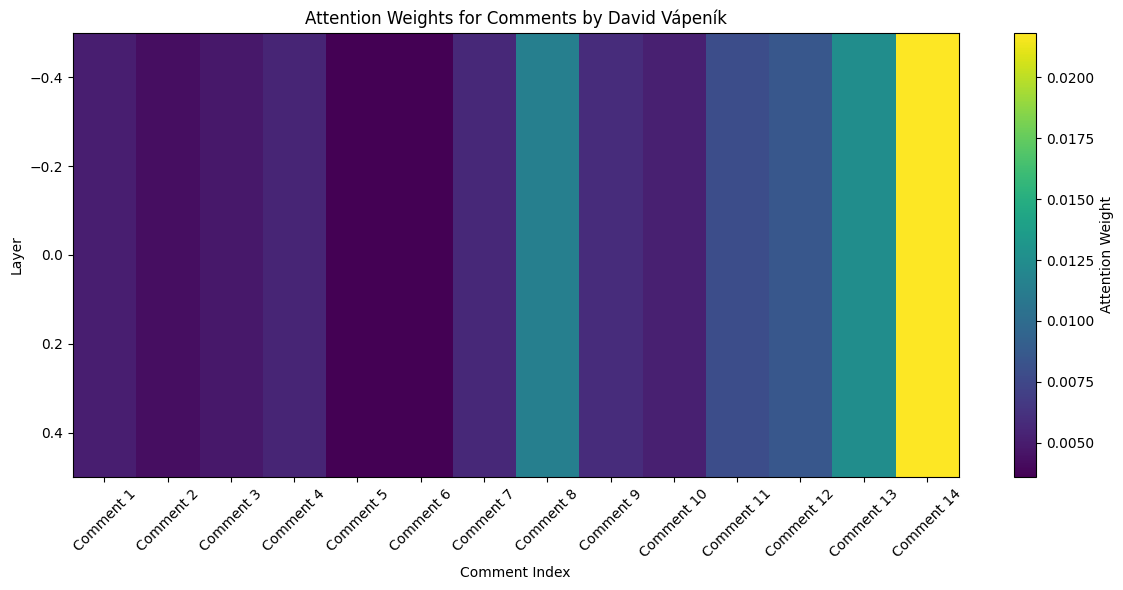


Attention Weight Statistics:
Mean attention weight: 0.008
Max attention weight: 0.022
Min attention weight: 0.004


In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Get attention weights from analysis results
attention_weights = [item['attention_weight'] for item in analysis_results['comment_analysis']]

# Create a heatmap of attention weights
plt.figure(figsize=(12, 6))
plt.imshow([attention_weights], aspect='auto', cmap='viridis')
plt.colorbar(label='Attention Weight')
plt.title(f'Attention Weights for Comments by {username}')
plt.xlabel('Comment Index')
plt.ylabel('Layer')

# Add comment text as y-tick labels
comment_texts = [item['text'] for item in analysis_results['comment_analysis']]
plt.xticks(range(len(comment_texts)), [f'Comment {i+1}' for i in range(len(comment_texts))], rotation=45)

plt.tight_layout()
plt.show()

# Print some statistics about attention weights
print(f"\nAttention Weight Statistics:")
print(f"Mean attention weight: {np.mean(attention_weights):.3f}")
print(f"Max attention weight: {np.max(attention_weights):.3f}")
print(f"Min attention weight: {np.min(attention_weights):.3f}")


In [10]:
# Get comments with highest attention weights
sorted_comments = sorted(analysis_results['comment_analysis'], 
                        key=lambda x: x['attention_weight'], 
                        reverse=True)

print("\nComments with Highest Attention Weights:")
print("-" * 80)
for i, comment in enumerate(sorted_comments[:5], 1):  # Show top 5 comments
    print(f"\n{i}. Attention Weight: {comment['attention_weight']:.3f}")
    print(f"Comment {comment['comment_number']}:")
    print(f"{comment['text']}")
    print("-" * 80)



Comments with Highest Attention Weights:
--------------------------------------------------------------------------------

1. Attention Weight: 0.065
Comment 161:
Zajímavé, jak vydrbat s volbama chce jen Trump , naopak Demokraté čistota sama.
--------------------------------------------------------------------------------

2. Attention Weight: 0.061
Comment 125:
Je normální, že ve válce slabší prohraje. Je třeba přiznat, že tentokrát to bude Ukrajina.
--------------------------------------------------------------------------------

3. Attention Weight: 0.057
Comment 178:
Konečně někdo.
--------------------------------------------------------------------------------

4. Attention Weight: 0.056
Comment 61:
Musíme přece podpořit Ukrajinu ještě víc. To je jasný.
--------------------------------------------------------------------------------

5. Attention Weight: 0.054
Comment 119:
Koho mě to u nás připomíná?
--------------------------------------------------------------------------------

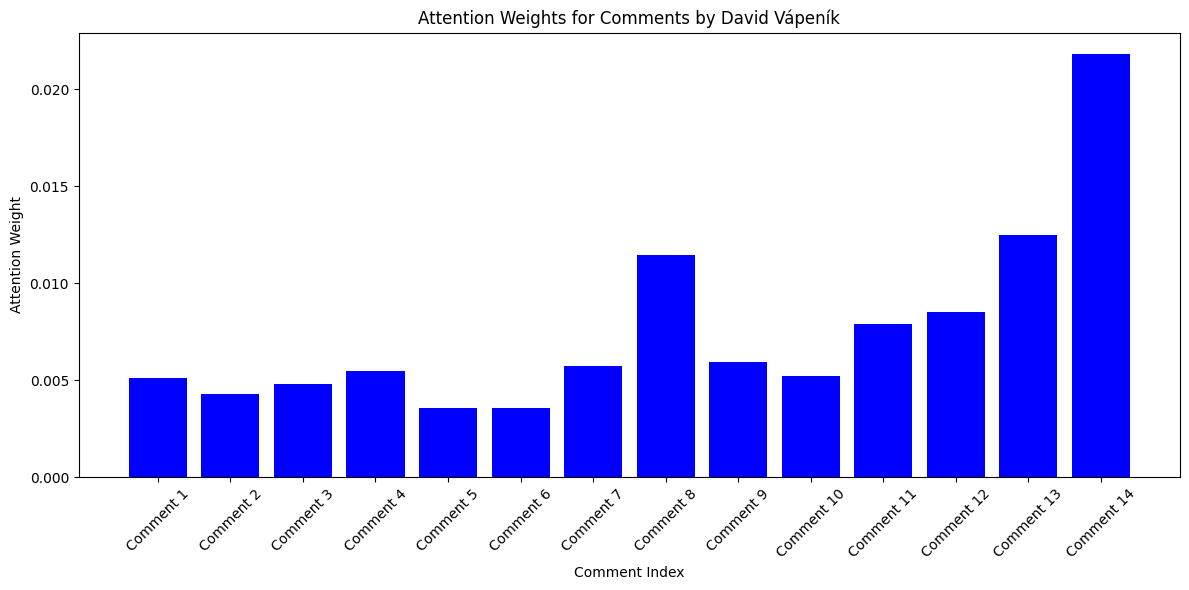


Attention Weight Statistics:
Mean attention weight: 0.008
Max attention weight: 0.022
Min attention weight: 0.004


In [20]:
# Get attention weights from analysis results
attention_weights = [item['attention_weight'] for item in analysis_results['comment_analysis']]

# Create a bar plot of attention weights
plt.figure(figsize=(12, 6))
plt.bar(range(len(attention_weights)), attention_weights, color='blue')  # Changed from 'viridis' to 'blue'
plt.title(f'Attention Weights for Comments by {username}')
plt.xlabel('Comment Index')
plt.ylabel('Attention Weight')

# Add comment text as x-tick labels
comment_texts = [item['text'] for item in analysis_results['comment_analysis']]
plt.xticks(range(len(comment_texts)), [f'Comment {i+1}' for i in range(len(comment_texts))], rotation=45)

plt.tight_layout()
plt.show()

# Print some statistics about attention weights
print(f"\nAttention Weight Statistics:")
print(f"Mean attention weight: {np.mean(attention_weights):.3f}")
print(f"Max attention weight: {np.max(attention_weights):.3f}")
print(f"Min attention weight: {np.min(attention_weights):.3f}")


In [19]:
# Get top 3 and bottom 3 comments by attention weight
top_comments = sorted(analysis_results['comment_analysis'], 
                     key=lambda x: x['attention_weight'], 
                     reverse=True)[:3]
bottom_comments = sorted(analysis_results['comment_analysis'], 
                        key=lambda x: x['attention_weight'])[:3]

print("Top 3 comments by attention weight with individual troll scores:")
print("-" * 80)

for i, comment in enumerate(top_comments, 1):
    # Get individual prediction for this comment
    result = predictor.predict([comment['text']])
    
    print(f"\n{i}. Comment (Attention Weight: {comment['attention_weight']:.3f})")
    print(f"Text: {comment['text']}")
    print(f"Individual Troll Score: {result['trolliness_score']:.3f}")
    print("-" * 80)

print("\nBottom 3 comments by attention weight with individual troll scores:")
print("-" * 80)

for i, comment in enumerate(bottom_comments, 1):
    # Get individual prediction for this comment
    result = predictor.predict([comment['text']])
    
    print(f"\n{i}. Comment (Attention Weight: {comment['attention_weight']:.3f})")
    print(f"Text: {comment['text']}")
    print(f"Individual Troll Score: {result['trolliness_score']:.3f}")
    print("-" * 80)

Top 3 comments by attention weight with individual troll scores:
--------------------------------------------------------------------------------

1. Comment (Attention Weight: 0.022)
Text: To je Hollywood , co jsou schopní ještě udělat pro pro očistu arabského psa
Individual Troll Score: 0.756
--------------------------------------------------------------------------------

2. Comment (Attention Weight: 0.012)
Text: Škoda ze nešel do mešity
Individual Troll Score: 0.744
--------------------------------------------------------------------------------

3. Comment (Attention Weight: 0.011)
Text: Tak jediný kdo tady něco někdy šířil tak byla vláda toho to pacienta
Individual Troll Score: 0.744
--------------------------------------------------------------------------------

Bottom 3 comments by attention weight with individual troll scores:
--------------------------------------------------------------------------------

1. Comment (Attention Weight: 0.004)
Text: Tak kam asi jste to rozkr